In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from plotly import graph_objects as go
from plotly.subplots import make_subplots


In [6]:
data = pd.read_csv("C:\\Users\\tchom\\Desktop\\project-web-data\\bmw-uk-market-analysis\\data\\BMW sales data (2010-2024).csv")
data

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


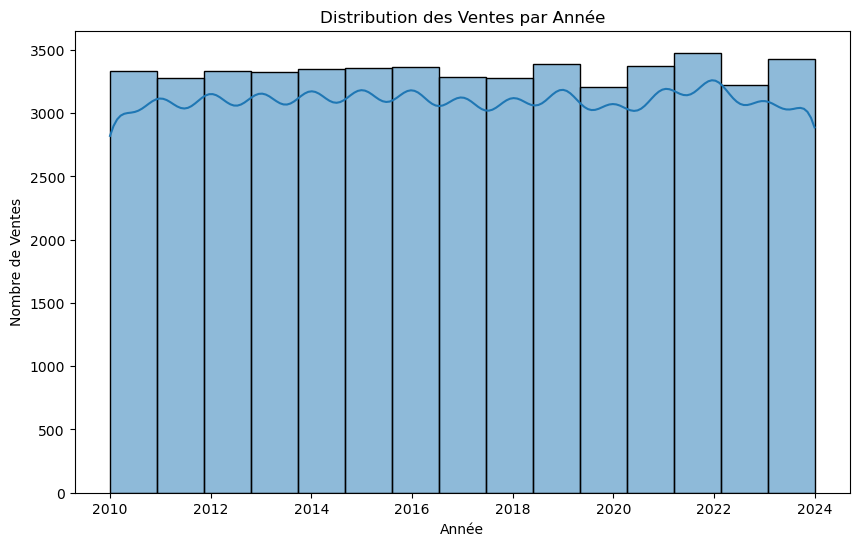

In [8]:
# faison un graphique de la distribution des ventes par annee
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Year', bins=15, kde=True)
plt.title('Distribution des Ventes par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Ventes')
plt.show()


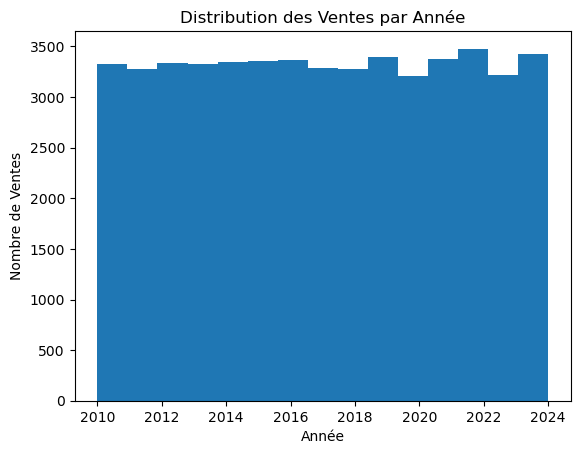

In [9]:
# faisons une analyse exploratoire des données
import plotly.express as px
plt.hist(data['Year'], bins=15)
plt.title('Distribution des Ventes par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Ventes')
plt.show()

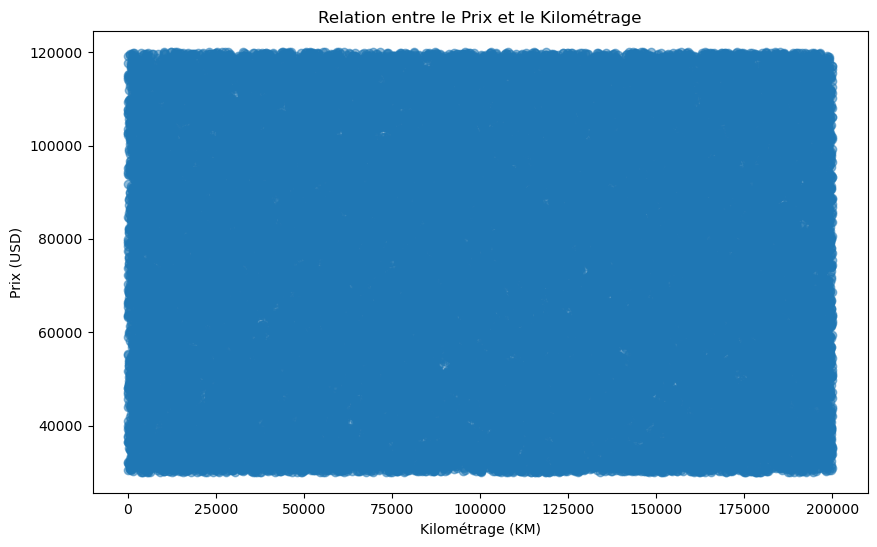

In [10]:
# faisons un diagramme de dispersion pour visualiser la relation entre le prix et le kilométrage
plt.figure(figsize=(10,6))
plt.scatter(data['Mileage_KM'], data['Price_USD'], alpha=0.5)
plt.title('Relation entre le Prix et le Kilométrage')
plt.xlabel('Kilométrage (KM)')
plt.ylabel('Prix (USD)')
plt.show()
# install into the current kernel's Python
import sys
!{sys.executable} -m pip install plotly

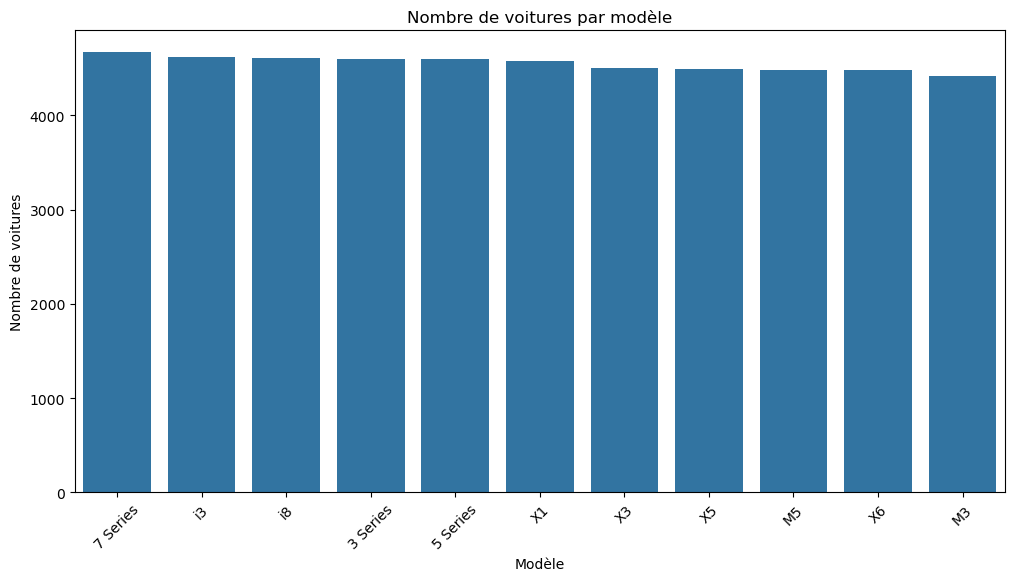

In [11]:
# Faisons un countplot pour visualiser le nombre de voitures par modèle
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Model', order=data['Model'].value_counts().index)
plt.title('Nombre de voitures par modèle')
plt.xlabel('Modèle')
plt.ylabel('Nombre de voitures')
plt.xticks(rotation=45)
plt.show()

In [12]:
#  faisons un subplot pour visualiser plusieurs graphiques en une seule figure
fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution des Ventes par Année', 'Relation entre le Prix et le Kilométrage', 'Nombre de voitures par modèle', 'Prix vs Kilométrage Contour',    ))
fig.add_trace(go.Histogram(x=data['Year'], nbinsx=15, name='Année'), row=1, col=1)
fig.add_trace(go.Scatter(x=data['Mileage_KM'], y=data['Price_USD'], mode='markers', name='Prix vs Kilométrage'), row=1, col=2)
fig.add_trace(go.Bar(x=data['Model'].value_counts().index, y=data['Model'].value_counts().values, name='Nombre de voitures par modèle'), row=1, col=2)
fig.add_trace(go.Contour(x=data['Mileage_KM'], y=data['Price_USD'], name='Prix vs Kilométrage Contour'), row=1, col=2)
fig.update_layout(title_text='Analyse Exploratoire des Données BMW', showlegend=False)  
fig.show()

In [13]:
# Faisons des hlines et vlines pour marquer des points importants
fig.add_hline(y=30000, line_dash="dot", annotation_text="Prix Moyen", annotation_position="top left", fillcolor="red")
fig.add_vline(x=50000, line_dash="dash", annotation_text="Kilométrage Moyen", annotation_position="top right", fillcolor="blue")
fig.show()

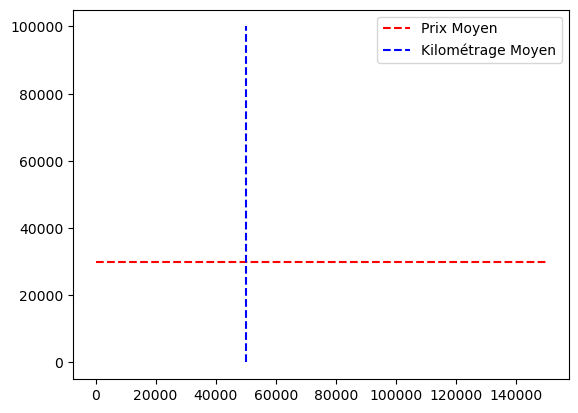

In [14]:
plt.hlines(y=30000, xmin=0, xmax=150000, colors='r', linestyles='dashed', label='Prix Moyen')
plt.vlines(x=50000, ymin=0, ymax=100000, colors='b', linestyles='dashed', label='Kilométrage Moyen')
plt.legend()

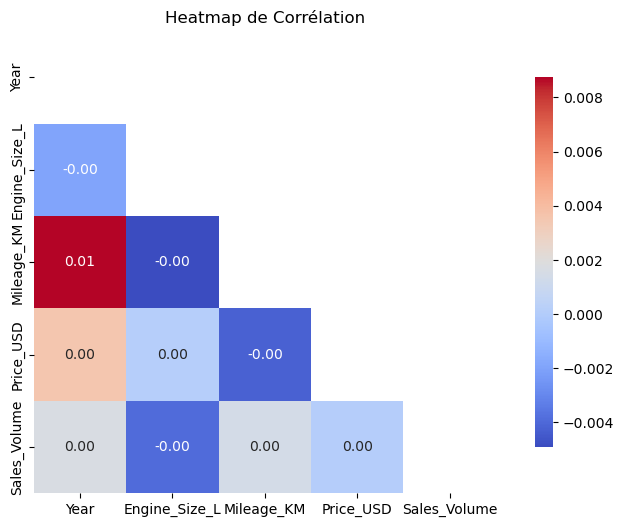

In [15]:
# faisons un heatmap pour visualiser la corrélation entre les variables
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(numeric_data.corr(), dtype=bool))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title("Heatmap de Corrélation")
plt.show()

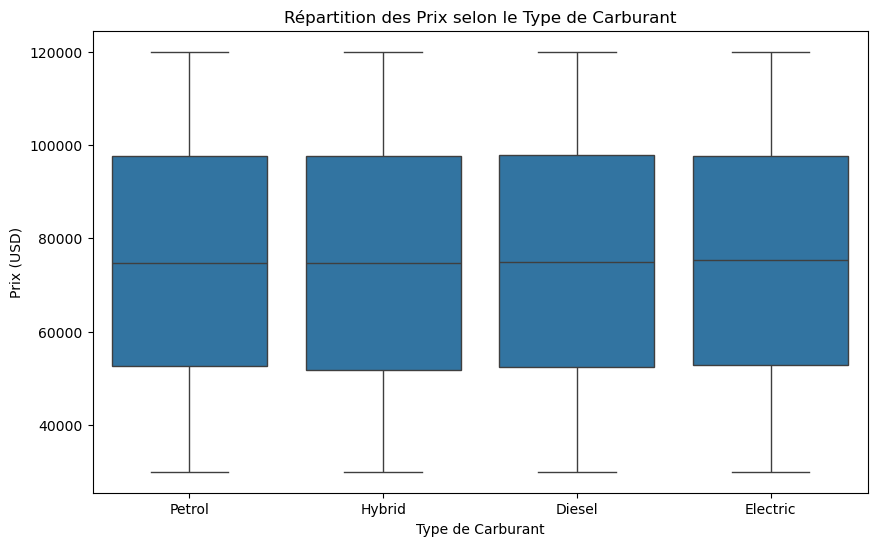

In [16]:
# Quelle est la répartition des prix selon le type de carburant ?
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Fuel_Type', y='Price_USD')
plt.title('Répartition des Prix selon le Type de Carburant')
plt.xlabel('Type de Carburant')
plt.ylabel('Prix (USD)')    
plt.show()

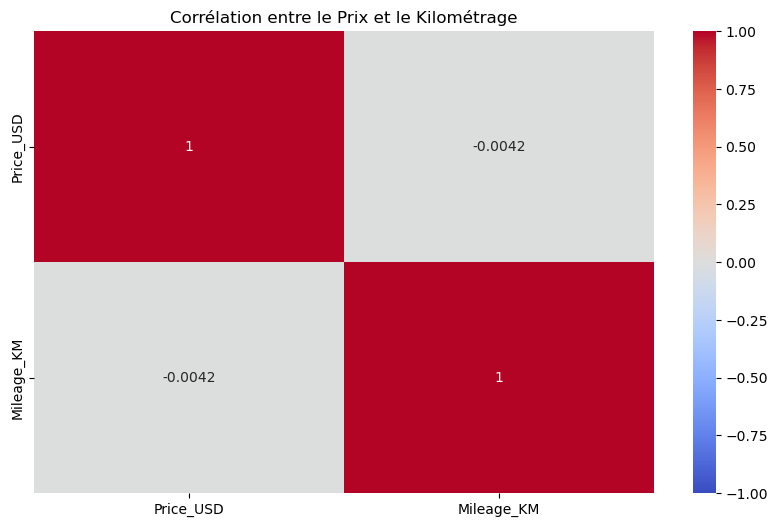

In [17]:
# Y a-t-il une corrélation entre le prix et le kilométrage
plt.figure(figsize=(10,6))
sns.heatmap(data[['Price_USD', 'Mileage_KM']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Corrélation entre le Prix et le Kilométrage')
plt.show()

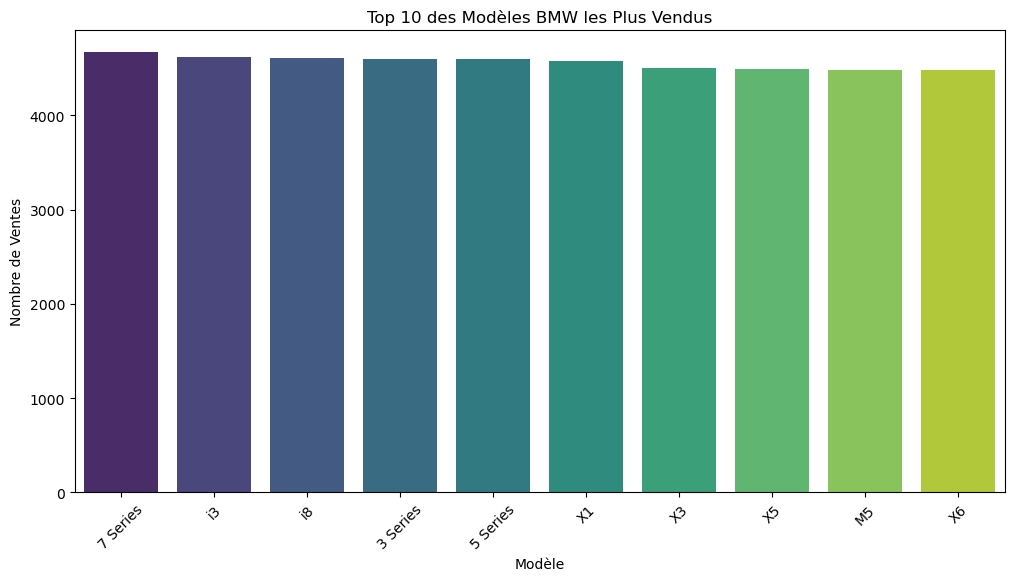

In [18]:
# Quels sont les modèles BMW les plus vendus ?
top_models = data['Model'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_models.index, y=top_models.values, hue=top_models.index, palette='viridis')
plt.title('Top 10 des Modèles BMW les Plus Vendus')
plt.xlabel('Modèle')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)
plt.show()

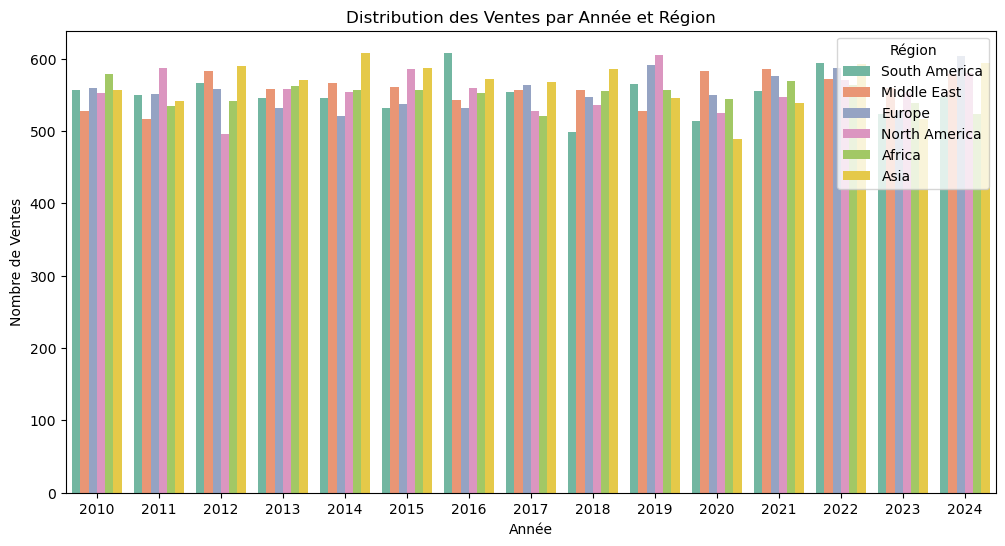

In [19]:
# Quelle est la distribution des ventes par année et région ?
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Year', hue='Region', palette='Set2')
plt.title('Distribution des Ventes par Année et Région')
plt.xlabel('Année')
plt.ylabel('Nombre de Ventes')
plt.legend(title='Région')
plt.show()


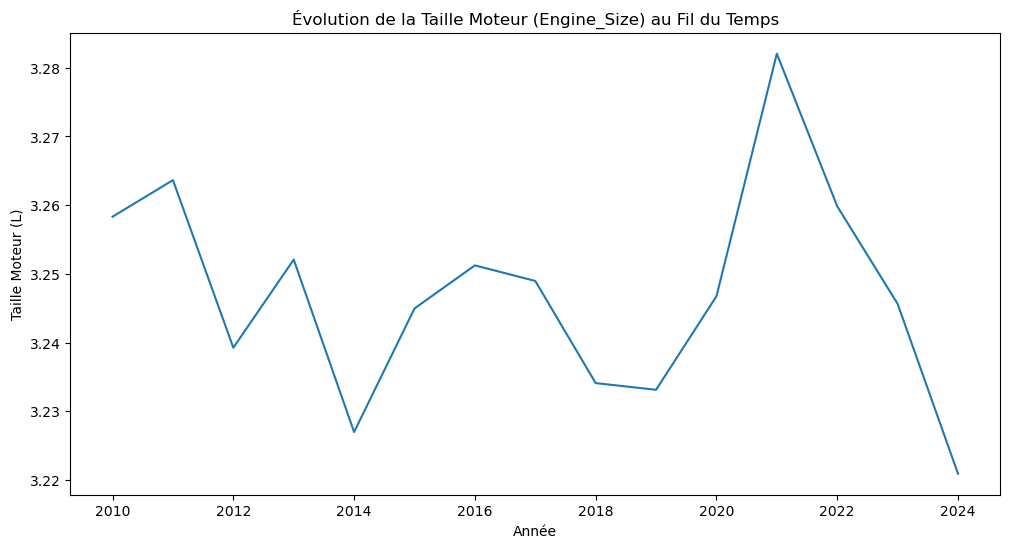

In [20]:
# Comment évolue la taille moteur (Engine_Size) au fil du temps ?
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Year', y='Engine_Size_L', errorbar=None)
plt.title('Évolution de la Taille Moteur (Engine_Size) au Fil du Temps')
plt.xlabel('Année')
plt.ylabel('Taille Moteur (L)')
plt.show()

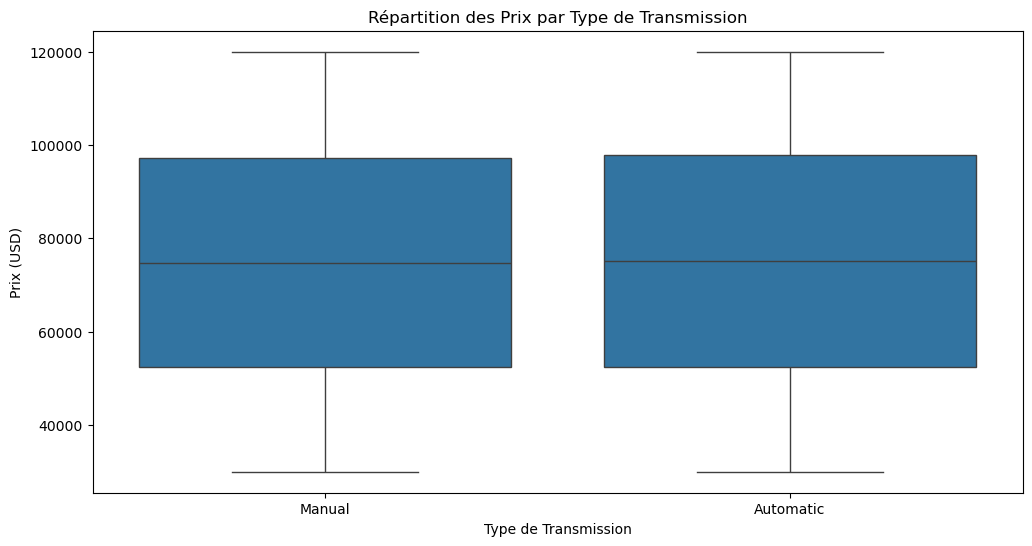

In [21]:
# Quels sont les moyens et extrêmes de prix par type de transmission ?
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Transmission', y='Price_USD')
plt.title('Répartition des Prix par Type de Transmission')
plt.xlabel('Type de Transmission')
plt.ylabel('Prix (USD)')
plt.show()

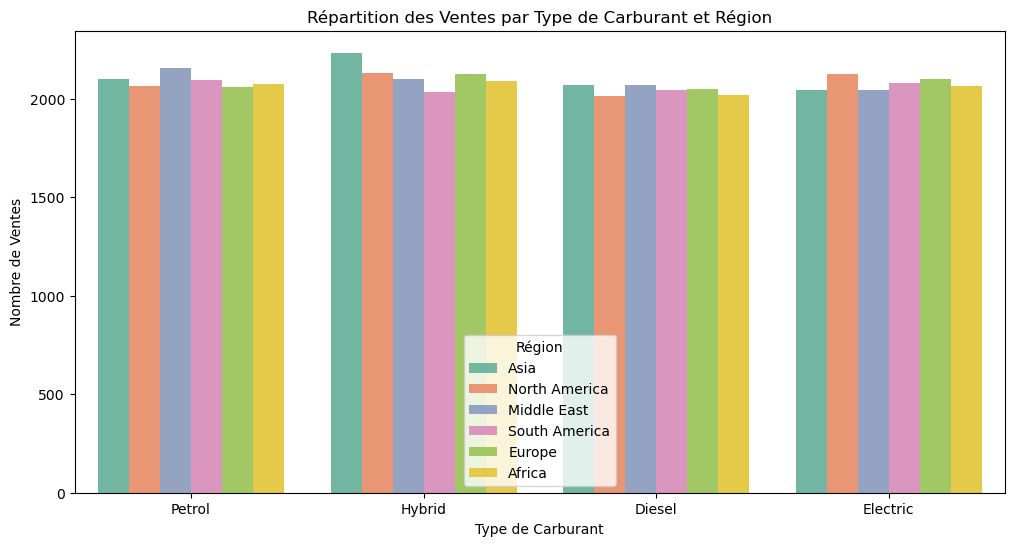

In [22]:
# Quelle est la repartition des ventes par type de carburant et région ?
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Fuel_Type', hue='Region', palette='Set2')
plt.title('Répartition des Ventes par Type de Carburant et Région')
plt.xlabel('Type de Carburant')
plt.ylabel('Nombre de Ventes')
plt.legend(title='Région')
plt.show()
#  --- IGNORE ---

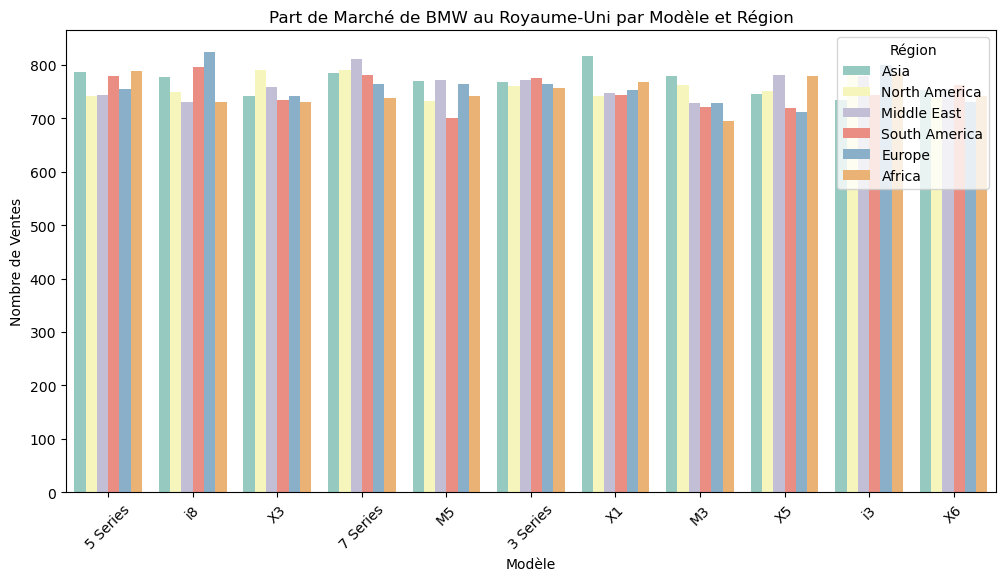

In [23]:
# Quelle est la part de marché de BMW au Royaume-Uni par modèle et région ?
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Model', hue='Region', palette='Set3')
plt.title('Part de Marché de BMW au Royaume-Uni par Modèle et Région')
plt.xlabel('Modèle')
plt.ylabel('Nombre de Ventes')
plt.legend(title='Région')
plt.xticks(rotation=45)
plt.show()

## JOINTURE DES DEUX DATASETS. 

In [24]:
cars = pd.read_csv("C:\\Users\\tchom\\Desktop\\project-web-data\\bmw-uk-market-analysis\\data\\cars_dataset.csv")
print("cars dataset loaded")
cars
print("data dataset loaded")
data

cars dataset loaded
data dataset loaded


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [25]:
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [26]:
# joignos les deux datasets
data_cars = pd.concat([cars, data], ignore_index=True)

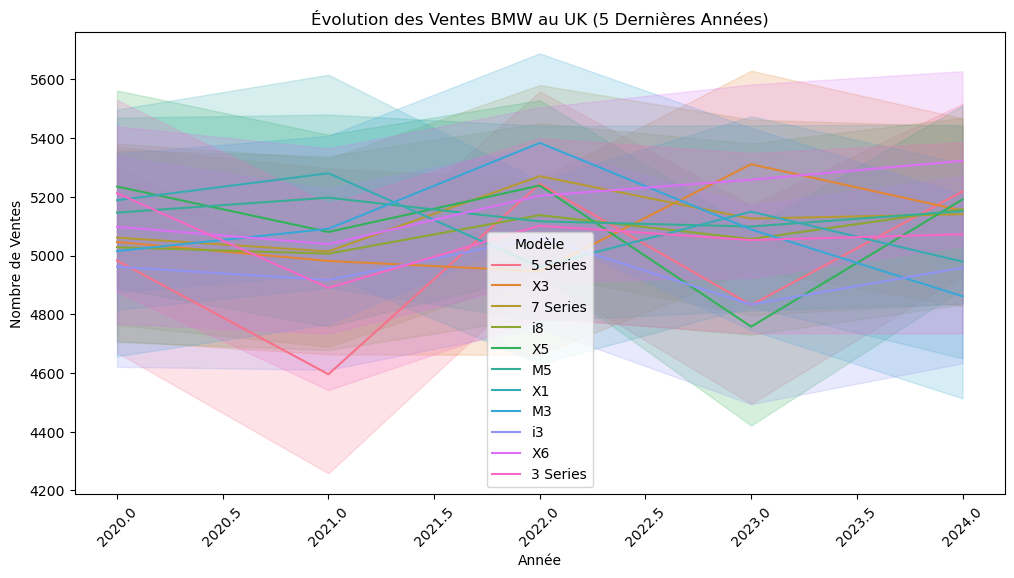

In [27]:
# Continuons avec les visuels
# Comment évoluent les ventes BMW au UK sur les 5 dernières années par modèle et canal de distribution ?
recent_years = data_cars['Year'].dropna().unique()
recent_years = sorted(recent_years)[-5:]
df_recent = data_cars[data_cars['Year'].isin(recent_years)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_recent, x='Year', y='Sales_Volume', hue='Model', markers=True, dashes=False)
plt.title('Évolution des Ventes BMW au UK (5 Dernières Années)')
plt.xlabel('Année')
plt.ylabel('Nombre de Ventes')
plt.legend(title='Modèle')
plt.xticks(rotation=45)
plt.show()

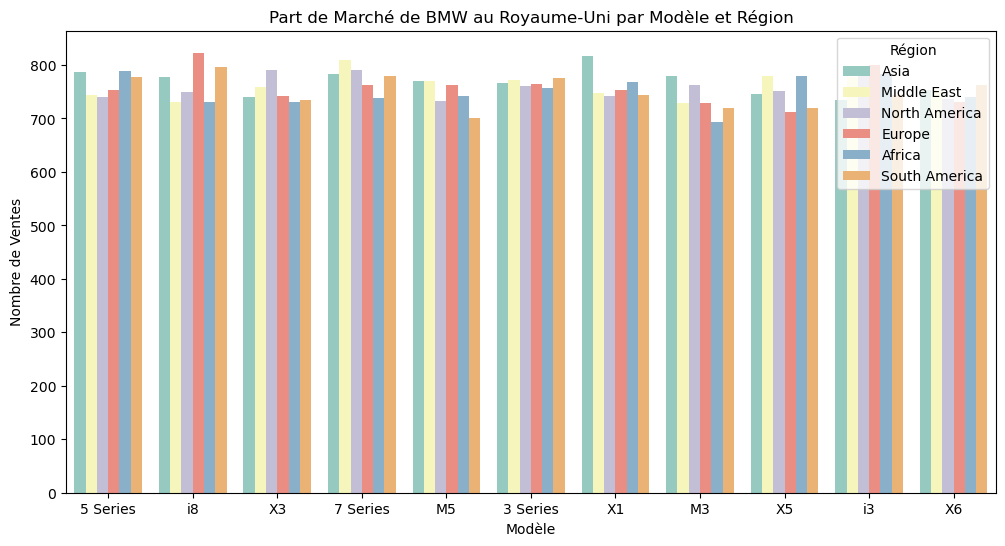

In [28]:
# Quelle est la part de marché de BMW au Royaume-Uni par modèle (proxy de segment), région et année ?
plt.figure(figsize=(12,6))
sns.countplot(data=data_cars, x='Model', hue='Region', hue_order=data_cars['Region'].value_counts().index, palette='Set3')
plt.title('Part de Marché de BMW au Royaume-Uni par Modèle et Région')
plt.xlabel('Modèle')
plt.ylabel('Nombre de Ventes')
plt.legend(title='Région')
#  --- IGNORE --
plt.show()

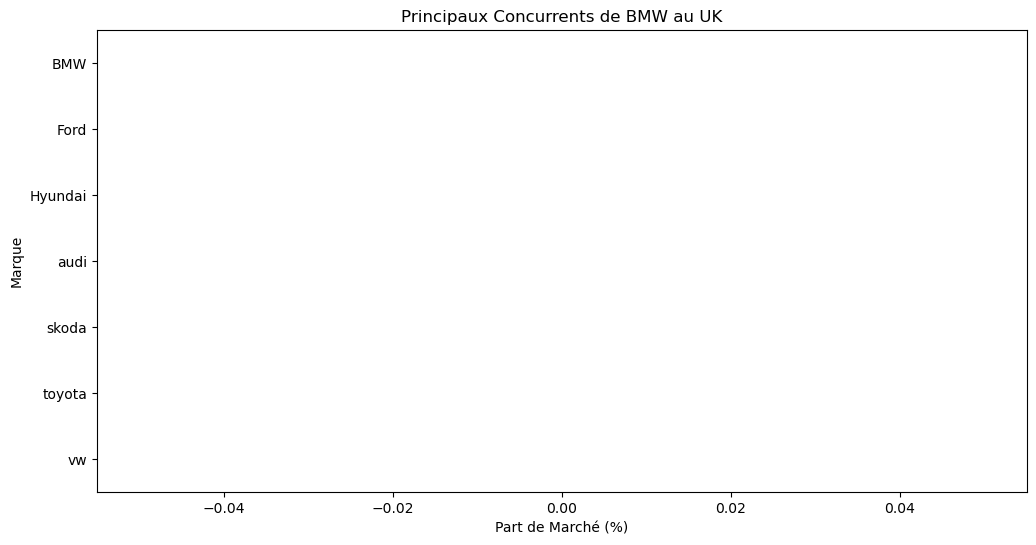

In [29]:
# Quels sont les principaux concurrents de BMW au UK selon les volumes de ventes et la part de marché ?
# Calculons la part de marché par marque (Make)
brand_sales = data_cars.groupby('Make')['Sales_Volume'].sum().reset_index()
total_sales = brand_sales['Sales_Volume'].sum()
brand_sales['Market_Share'] = 100 * brand_sales['Sales_Volume'] / total_sales

plt.figure(figsize=(12,6))
sns.barplot(data=brand_sales, x='Market_Share', y='Make', hue='Make', palette='Set2')
plt.title('Principaux Concurrents de BMW au UK')
plt.xlabel('Part de Marché (%)')
plt.ylabel('Marque')
plt.show()

C:\Users\tchom\AppData\Local\Temp\ipykernel_20536\532696138.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



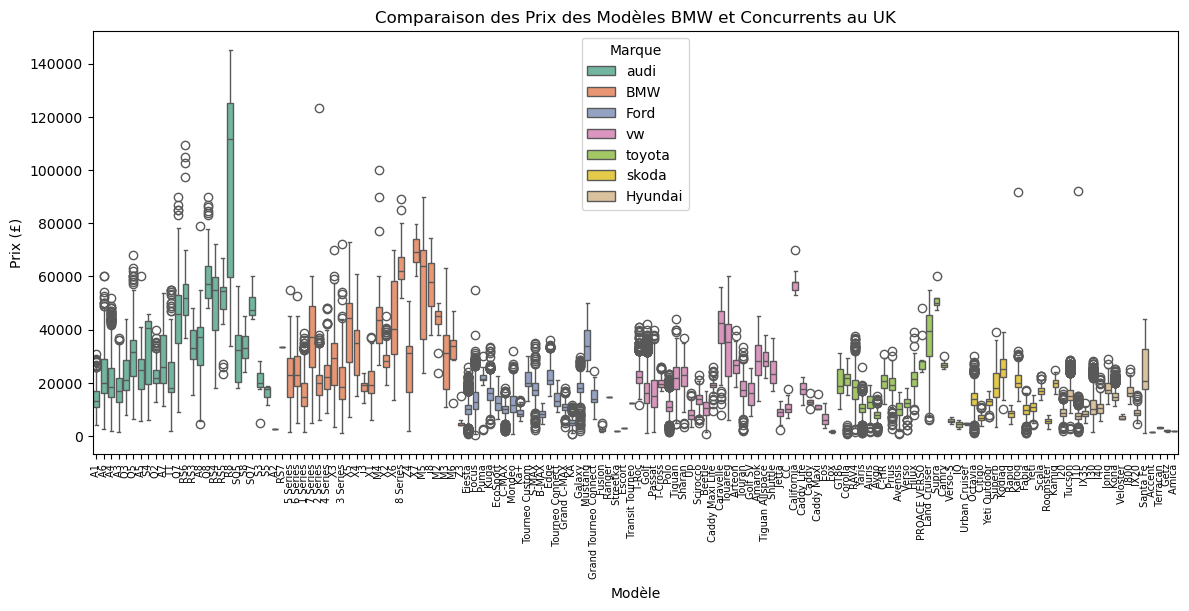

In [30]:
# Comment se positionnent les prix des modèles BMW par rapport à ceux des concurrents sur le marché UK ?
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=data_cars, x='model', y='price', hue='Make', palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=7)
plt.tight_layout()
plt.title('Comparaison des Prix des Modèles BMW et Concurrents au UK')
plt.xlabel('Modèle')
plt.ylabel('Prix (£)')
plt.legend(title='Marque')
plt.show()

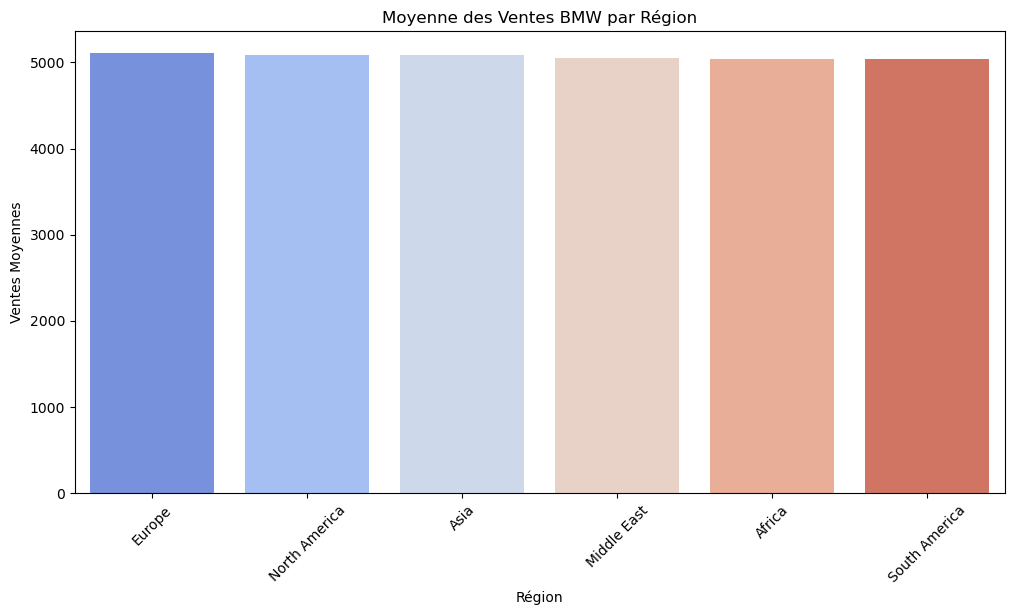

In [31]:
# Quelles régions ou segments présentent la plus forte corrélation entre pouvoir d’achat et ventes BMW ?
# Comme 'Purchasing_Power_Index' n'existe pas, on affiche la moyenne des ventes par région

region_sales = data_cars.groupby('Region')['Sales_Volume'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='coolwarm')
plt.title('Moyenne des Ventes BMW par Région')
plt.xlabel('Région')
plt.ylabel('Ventes Moyennes')
plt.xticks(rotation=45)
plt.show()

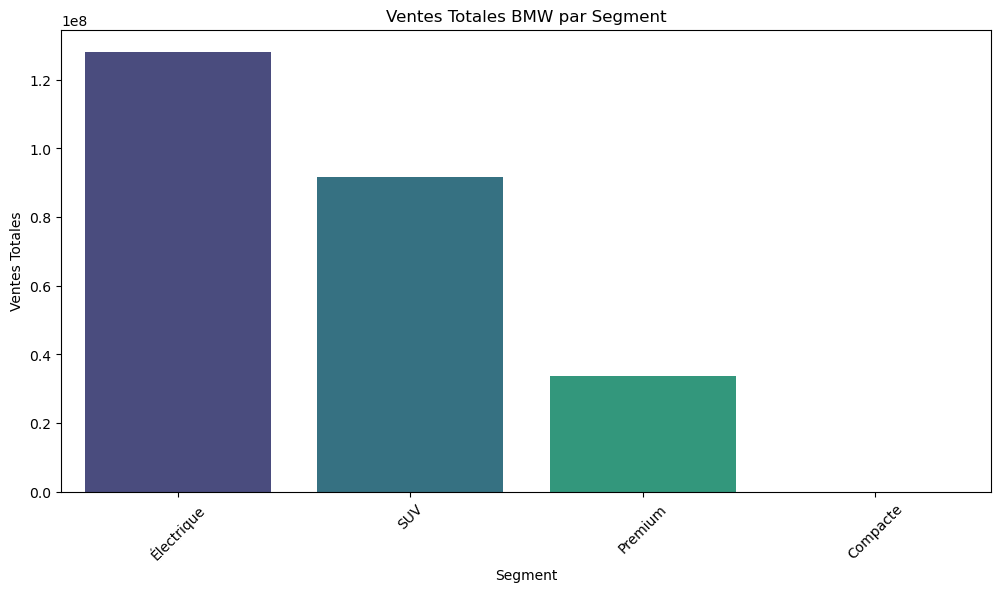

In [32]:
# Quels segments clients (compacte, SUV, premium, électrique) montrent la plus forte progression ?
def infer_segment(row):
	# Use BMW model names and fuel type to infer segment
	model = str(row['Model']).lower() if pd.notnull(row['Model']) else ''
	fuel = str(row['Fuel_Type']).lower() if pd.notnull(row['Fuel_Type']) else ''
	if 'x' in model or 'suv' in model:
		return 'SUV'
	elif 'i' in model or fuel == 'electric':
		return 'Électrique'
	elif 'series' in model or 'm' in model:
		return 'Premium'
	else:
		return 'Compacte'

data_cars['Segment'] = data_cars.apply(infer_segment, axis=1)

segment_sales = data_cars.groupby('Segment')['Sales_Volume'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=segment_sales.index, y=segment_sales.values, hue=segment_sales.index, palette='viridis')
plt.title('Ventes Totales BMW par Segment')
plt.xlabel('Segment')
plt.ylabel('Ventes Totales')
plt.xticks(rotation=45)
plt.show()

UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

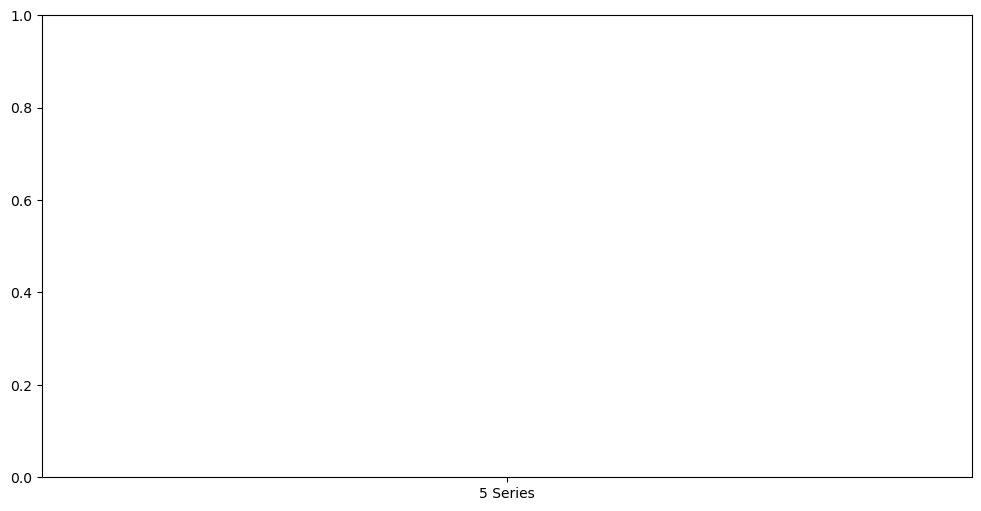

In [33]:
# Quels modèles BMW contribuent le plus au chiffre d’affaires et à la marge au UK ?
plt.figure(figsize=(12,6))
# ax = sns.boxplot
sns.boxplot(
	data=data_cars,
	x='Model',
	y='Price_USD',
	hue='Make',
	palette='Set2',
	boxprops={'facecolor': 'lightblue', 'edgecolor': 'black'}
)

plt.tight_layout()
plt.show()

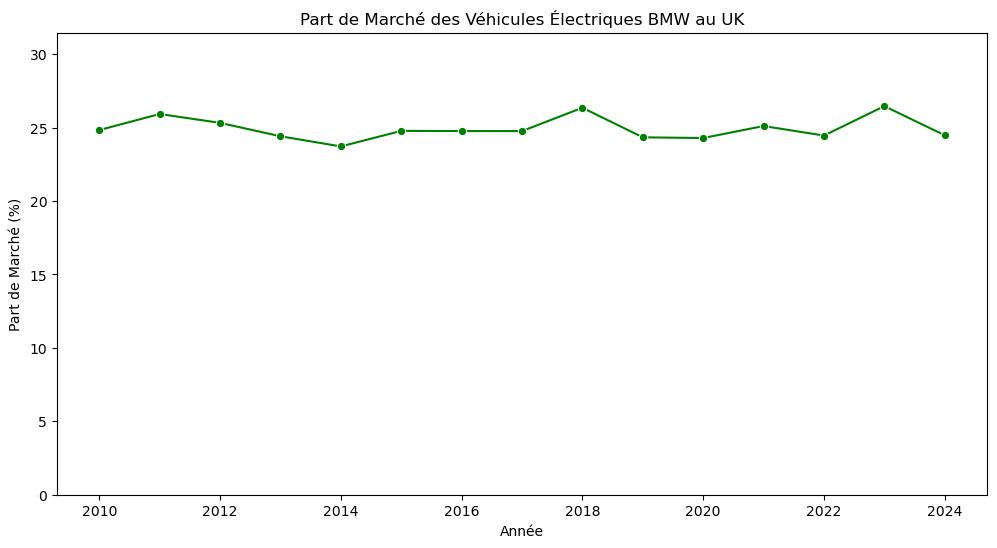

In [34]:
import pandas as pd

# Quel serait l’impact potentiel d’une hausse des ventes de véhicules électriques sur la part de marché globale de BMW ?
# Assurez-vous que 'data_cars' est défini avant d'exécuter ce code.
if 'data_cars' not in globals():
	# Try to create data_cars if missing
	if 'cars' not in globals():
		cars = pd.read_csv("C:\\Users\\tchom\\Desktop\\project-web-data\\bmw-uk-market-analysis\\data\\cars_dataset.csv")
	if 'data' not in globals():
		data = pd.read_csv("C:\\Users\\tchom\\Desktop\\project-web-data\\bmw-uk-market-analysis\\data\\BMW sales data (2010-2024).csv")
	data_cars = pd.concat([cars, data], ignore_index=True)

ev_sales = data_cars[data_cars['Fuel_Type'].str.lower() == 'electric']
ev_sales_by_year = ev_sales.groupby('Year')['Sales_Volume'].sum().reset_index()
total_sales_by_year = data_cars.groupby('Year')['Sales_Volume'].sum().reset_index()
market_share_ev = pd.merge(ev_sales_by_year, total_sales_by_year, on='Year', suffixes=('_EV', '_Total'))
market_share_ev['Market_Share_EV'] = 100 * market_share_ev['Sales_Volume_EV'] / market_share_ev['Sales_Volume_Total']   
plt.figure(figsize=(12,6))
sns.lineplot(data=market_share_ev, x='Year', y='Market_Share_EV', marker='o', color='green')
plt.title('Part de Marché des Véhicules Électriques BMW au UK')
plt.xlabel('Année')
plt.ylabel('Part de Marché (%)')    
plt.ylim(0, market_share_ev['Market_Share_EV'].max() + 5)
plt.show()